This kernal was modeled after Nagesh Singh Chauhan's work, which can be read here:
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

# Multiple Linear Regression

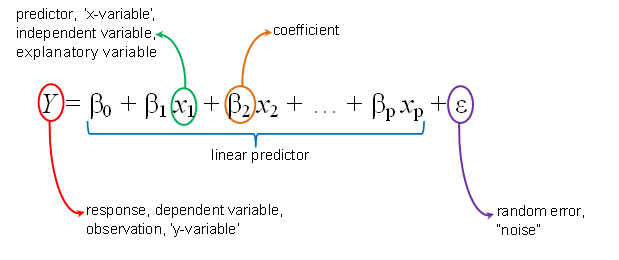

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().sum()  #yay, no NaN values to fill!

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 
             'residual sugar', 'chlorides', 'free sulfur dioxide', 
             'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values

y = df['quality'].values

We can see that the quality scores are centered around 5 and 6.

In [7]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_to_clean = ['fixed acidity',  'volatile acidity' , 'citric acid' , 'residual sugar' , 'chlorides' ,'free sulfur dioxide' , 'total sulfur dioxide'  ,'density' ,   'pH',  'sulphates' ,'alcohol','quality']

cleaned_data = remove_outliers_iqr(df.copy(), columns_to_clean)
print(cleaned_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

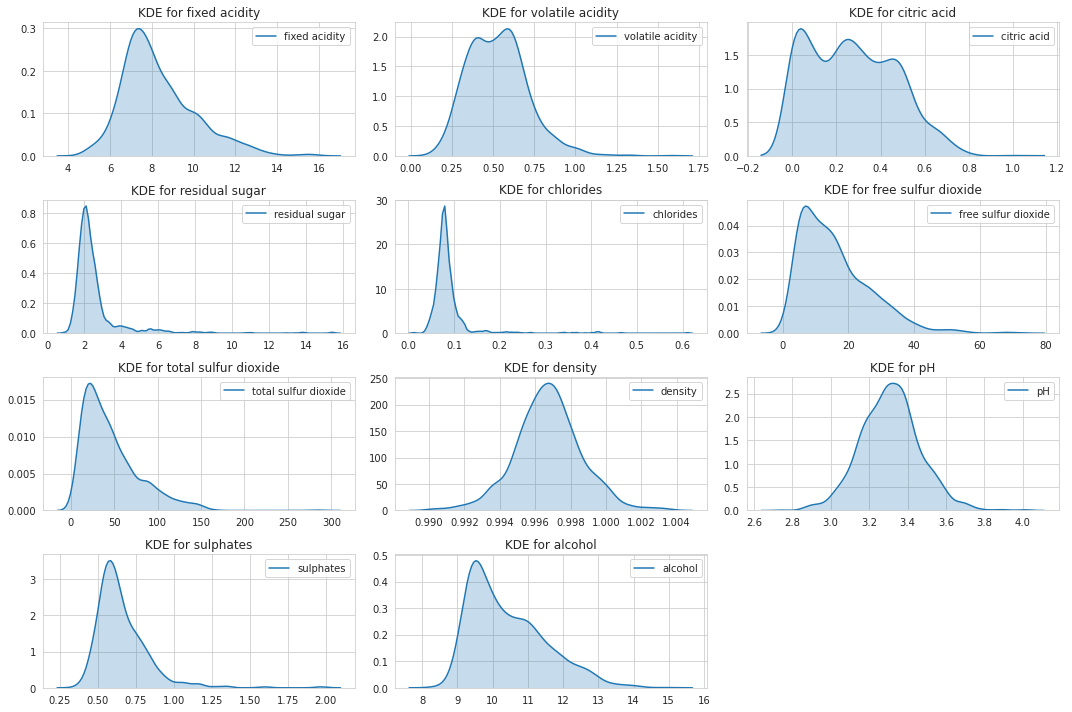

In [8]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# List of columns to plot
columns_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'density', 'pH', 'sulphates', 'alcohol']

# Plotting KDE plots for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)  # Adjust the layout as needed
    sns.kdeplot(df[column], shade=True)
    plt.title(f'KDE for {column}')

plt.tight_layout()
plt.show()

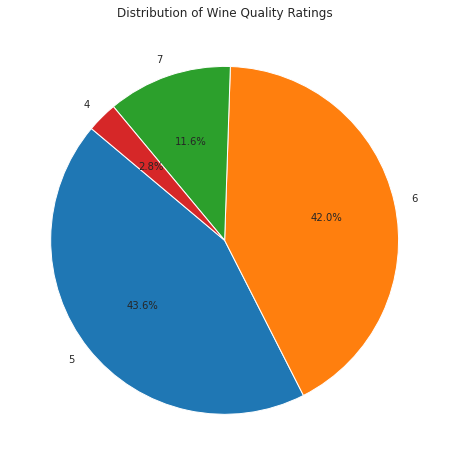

In [9]:
# Visualizing the distribution of the 'quality' variable using a pie chart
quality_counts = cleaned_data['quality'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wine Quality Ratings')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
x=df[['fixed acidity',  'volatile acidity' , 'citric acid' , 'residual sugar' , 'chlorides' ,'free sulfur dioxide' , 'total sulfur dioxide'  ,'density' ,   'pH',  'sulphates','alcohol']]
y=df[['quality']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


# Calculate MSE, RMSE, R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# For accuracy, round predictions and compare with actual values
y_pred_rounded = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_rounded)

# Output the results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")
print(f"Accuracy: {accuracy}")





MSE: 0.3900251439639542
RMSE: 0.6245199307980124
R-squared: 0.403180341279623
Accuracy: 0.571875


In [13]:
#in percentage
print(f"MSE in Percentage : {mse*100}%")
print(f"RMSE in Percentage : {rmse*100}%")
print(f"R-squared in Percentage : {r_squared*100}%")
print(f"Accuracy in Percentage : {accuracy*100}%")

MSE in Percentage : 39.00251439639542%
RMSE in Percentage : 62.45199307980124%
R-squared in Percentage : 40.3180341279623%
Accuracy in Percentage : 57.1875%


This means that for a unit increase in “density”, there is a decrease of 31.51 units in the quality of the wine. Similarly, a unit decrease in “Chlorides“ results in an increase of 1.87 units in the quality of the wine. We can see that the rest of the features have very little effect on the quality of the wine.

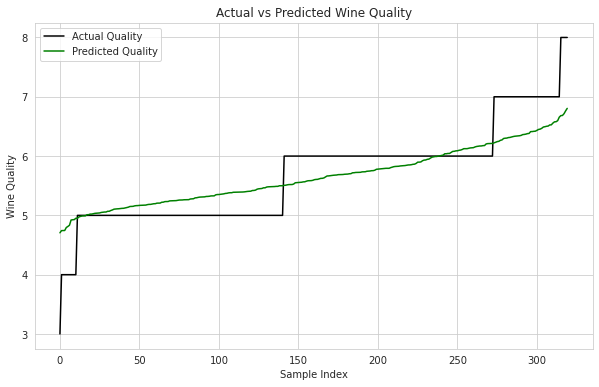

In [20]:
import matplotlib.pyplot as plt



# Sort the values for a cleaner plot (optional)
y_test_sorted = np.sort(y_test)
y_pred_sorted = np.sort(y_pred)

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Quality', color='black')
plt.plot(y_pred_sorted, label='Predicted Quality', color='green')

# Adding labels and title
plt.title('Actual vs Predicted Wine Quality')
plt.xlabel('Sample Index')
plt.ylabel('Wine Quality')
plt.legend()

# Show the plot
plt.show()


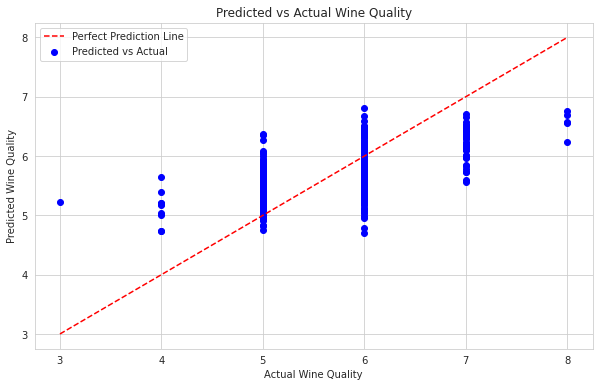

In [19]:
import matplotlib.pyplot as plt


# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Add a diagonal line for reference (where prediction = actual)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Adding labels and title
plt.title('Predicted vs Actual Wine Quality')
plt.xlabel('Actual Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.legend()

# Show the plot
plt.show()


In [17]:
# Reshape if necessary
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

# Create the DataFrame
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
print(df1)

    Actual  Predicted
0        6   5.346664
1        5   5.056313
2        6   5.664470
3        5   5.464515
4        6   5.725185
5        5   5.279287
6        5   5.034217
7        5   5.126233
8        5   5.745343
9        6   5.686650
10       7   6.139597
11       3   5.233869
12       5   5.549915
13       5   5.258253
14       6   5.448105
15       7   6.468290
16       5   5.150181
17       7   5.591052
18       8   6.556066
19       5   5.322558
20       5   5.391839
21       6   5.196108
22       5   5.944757
23       6   6.361976
24       6   5.354849


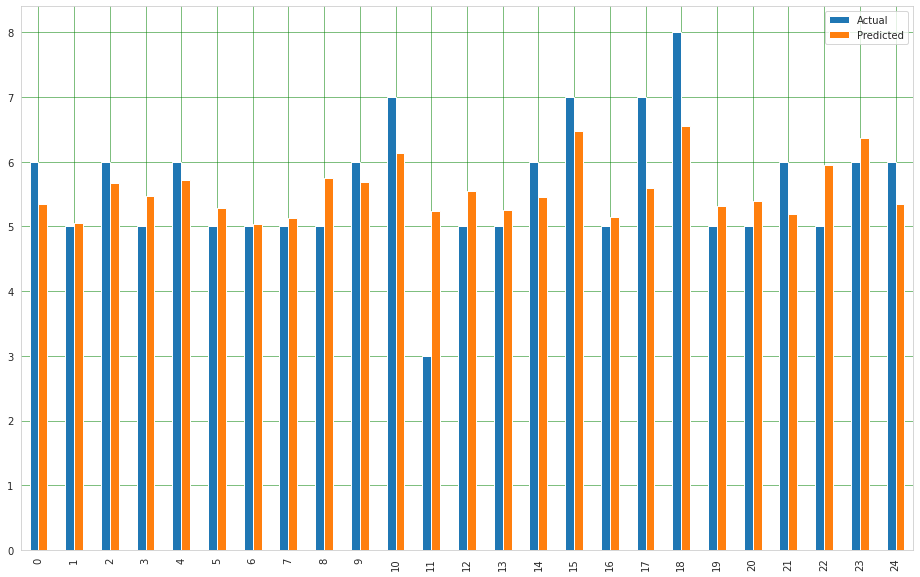

In [18]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

We can see a bar to bar comparison of our predicted vs actual wine quality. (for the first 25 values in our test set)

We see that the value of root mean squared error is 0.62, which is slightly greater than 10% of the mean value which is 5.63. This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, for example :

* Need more data: We need to have a huge amount of data to get the best possible prediction.

* Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.

* Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.